# BCRA

In [ ]:
import requests
import pandas as pd

def get_bcra_monetarias():
    url = "https://api.bcra.gob.ar/estadisticas/v3.0/Monetarias"
    response = requests.get(url, verify=False)
    data = response.json()["results"]
    return pd.DataFrame(data)

df_bcra = get_bcra_monetarias()
print(df_bcra.head())

# INDEC

In [ ]:
import requests
import pandas as pd

def get_indec_serie(serie_id):
    url = f"https://apis.datos.gob.ar/series/api/series/?ids={serie_id}&format=json"
    response = requests.get(url)
    data = response.json()["data"]
    df = pd.DataFrame(data, columns=["fecha", "valor"])
    df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
    return df

# Ejemplo: IPC Nacional (inflación) - cambiar el ID por el que necesites
df_indec = get_indec_serie("148.3_INIVELNAL_DICI_M_26")
print(df_indec.head())

        fecha     valor
0  2016-12-01  100.0000
1  2017-01-01  101.5859
2  2017-02-01  103.6859
3  2017-03-01  106.1476
4  2017-04-01  108.9667


Text(0, 0.5, 'Valor')

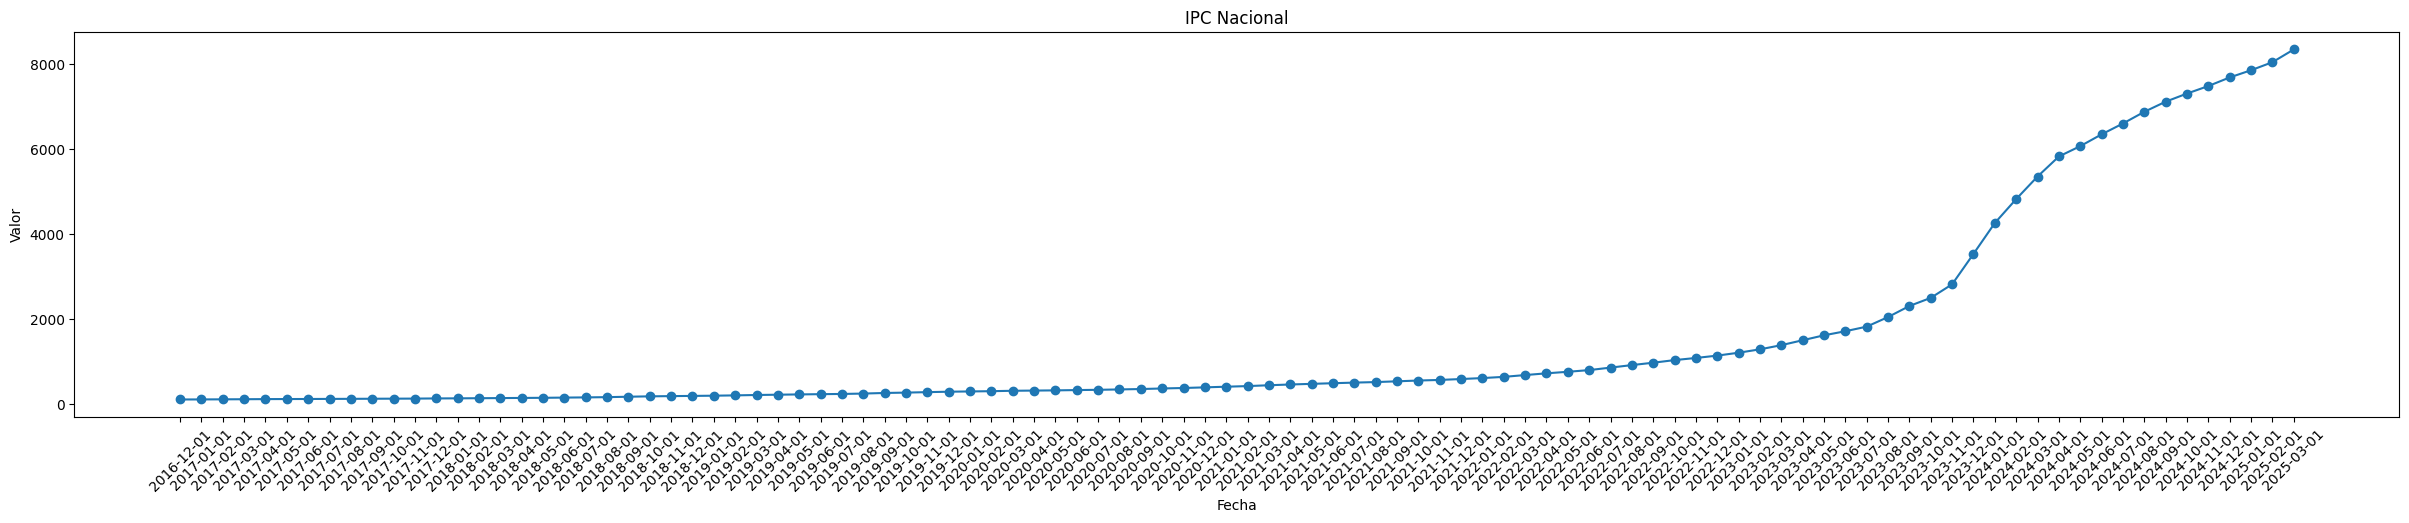

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,5))
plt.plot(df_indec["fecha"], df_indec["valor"], marker = "o")
plt.title("IPC Nacional")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.ylabel("Valor")

In [ ]:
df_indec.to_excel("df_indec.xlsx")
files.download("df_indec.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#168.1_T_CAMBIOR_D_0_0_26

import requests
import pandas as pd

def get_indec_serie(serie_id):
    url = f"https://apis.datos.gob.ar/series/api/series/?ids={serie_id}&format=json"
    response = requests.get(url)
    data = response.json()["data"]
    df = pd.DataFrame(data, columns=["fecha", "valor"])
    df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
    return df

# Ejemplo: IPC Nacional (inflación) - cambiar el ID por el que necesites
df_indec = get_indec_serie("168.1_T_CAMBIOR_D_0_0_26")
df_indec.head()



,fecha,valor
0,2014-11-03,8.49
1,2014-11-04,8.51
2,2014-11-05,8.51
3,2014-11-06,8.51
4,2014-11-07,8.51


In [ ]:
from google.colab import files
df_indec.to_excel("df_indec.xlsx")
files.download("df_indec.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

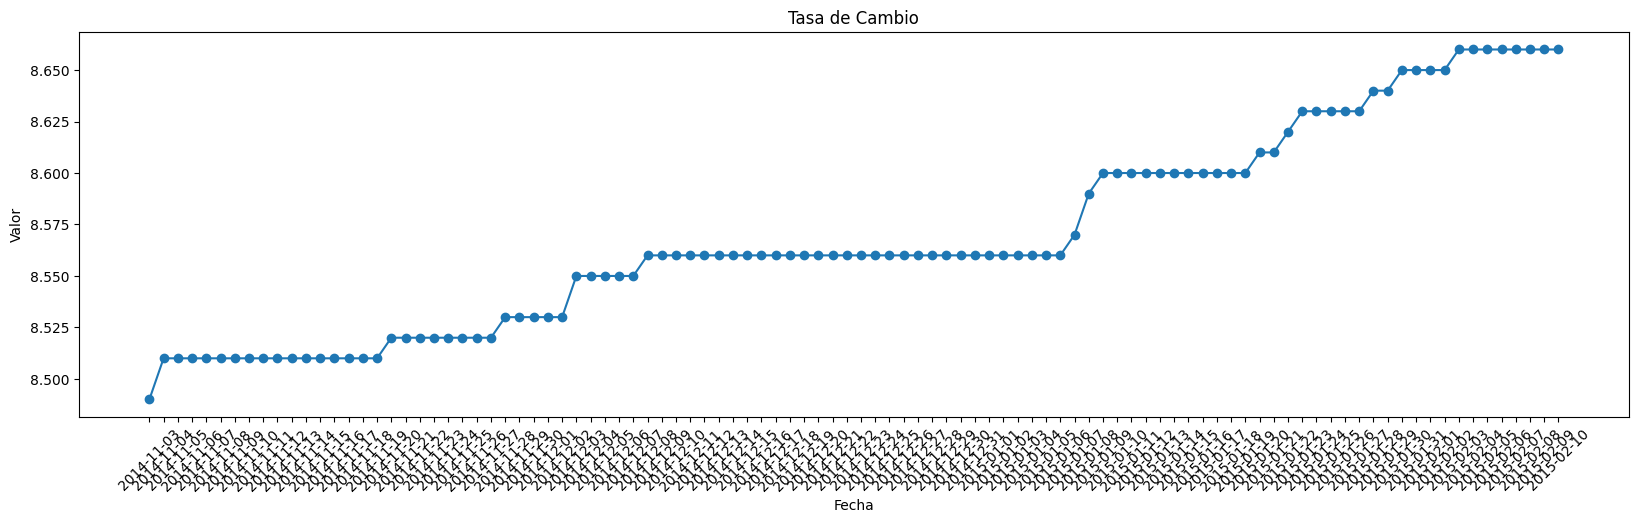

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(df_indec["fecha"], df_indec["valor"], marker = "o")
plt.title("Tasa de Cambio")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.show()

# FILTRAR DATOS INDEC

In [ ]:
# VARIAS SERIES A LA VEZ

serie_ids = "148.3_INIVELNAL_DICI_M_26,148.3_INIVELNAL_DICI_M_27"
url = f"https://apis.datos.gob.ar/series/api/series/?ids={serie_ids}&format=json&limit=1000"

#FILTRADO POR FECHAS

#url = f"https://apis.datos.gob.ar/series/api/series/?ids={serie_id}&format=json&start_date=2015-01-01&end_date=2024-01-01"

In [ ]:
import requests
import pandas as pd

def get_indec_series(serie_ids, limit=1000, start_date=None, end_date=None):
    url = f"https://apis.datos.gob.ar/series/api/series/?ids={serie_ids}&format=json&limit={limit}"
    if start_date:
        url += f"&start_date={start_date}"
    if end_date:
        url += f"&end_date={end_date}"
    response = requests.get(url)
    json_data = response.json()

    # Imprime la respuesta para depurar
    print(json_data)

    if "data" in json_data:
        df = pd.DataFrame(json_data["data"], columns=["fecha", "valor"])
        df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
        return df

    elif "series" in json_data:
        dfs = []
        for serie in json_data["series"]:
            serie_id = serie["id"]
            data = serie["data"]
            df = pd.DataFrame(data, columns=["fecha", serie_id])
            df[serie_id] = pd.to_numeric(df[serie_id], errors="coerce")
            dfs.append(df)
        df_final = dfs[0]
        for df in dfs[1:]:
            df_final = pd.merge(df_final, df, on="fecha", how="outer")
        return df_final

    elif "error" in json_data:
        raise ValueError(f"Error de la API: {json_data['error']}")

    else:
        raise ValueError(f"Respuesta inesperada de la API: {json_data}")

# Prueba el código y revisa la salida impresa para ver qué trae la API
serie_ids = "148.3_INIVELNAL_DICI_M_26,148.3_INIVELNAL_DICI_M_27"
df_indec = get_indec_series(serie_ids, limit=2000, start_date="2010-01-01")
print(df_indec.head())

{'errors': [{'error': 'Serie inexistente: 148.3_INIVELNAL_DICI_M_27'}], 'failed_series': ['148.3_INIVELNAL_DICI_M_27']}


ValueError: Respuesta inesperada de la API: {'errors': [{'error': 'Serie inexistente: 148.3_INIVELNAL_DICI_M_27'}], 'failed_series': ['148.3_INIVELNAL_DICI_M_27']}

# DOLAR_SI

In [ ]:
import requests
import pandas as pd

def get_dolarsi():
    url = "https://www.dolarsi.com/api/api.php?type=valoresprincipales"
    response = requests.get(url)
    data = response.json()
    # Extraer nombre y cotización
    rows = []
    for item in data:
        nombre = item["casa"]["nombre"]
        compra = item["casa"]["compra"].replace(",", ".")
        venta = item["casa"]["venta"].replace(",", ".")
        rows.append({"nombre": nombre, "compra": compra, "venta": venta})
    return pd.DataFrame(rows)

df_dolarsi = get_dolarsi()
print(df_dolarsi.head())

# DATOS ABIERTOS ARGENTINA

In [ ]:


import requests
import pandas as pd

def get_pbi_trimestral():
    url = "https://apis.datos.gob.ar/series/api/series/?ids=220.1_PCONSTRCAS_1970_0_33&format=json"
    response = requests.get(url)
    json_data = response.json()
    if "data" in json_data:
        data = json_data["data"]
        df_pbi = pd.DataFrame(data, columns=["fecha", "valor"])
        df_pbi["valor"] = pd.to_numeric(df_pbi["valor"], errors="coerce")
        return df_pbi
    else:
        print("No se encontró la clave 'data'. Respuesta de la API:")
        print(json_data)
        return pd.DataFrame()  # Devuelve un DataFrame vacío

df_pbi = get_pbi_trimestral()
print(df_pbi.head())


        fecha  valor
0  1980-01-01  234.0
1  1980-04-01  219.0
2  1980-07-01  310.0
3  1980-10-01  482.0
4  1981-01-01  217.0


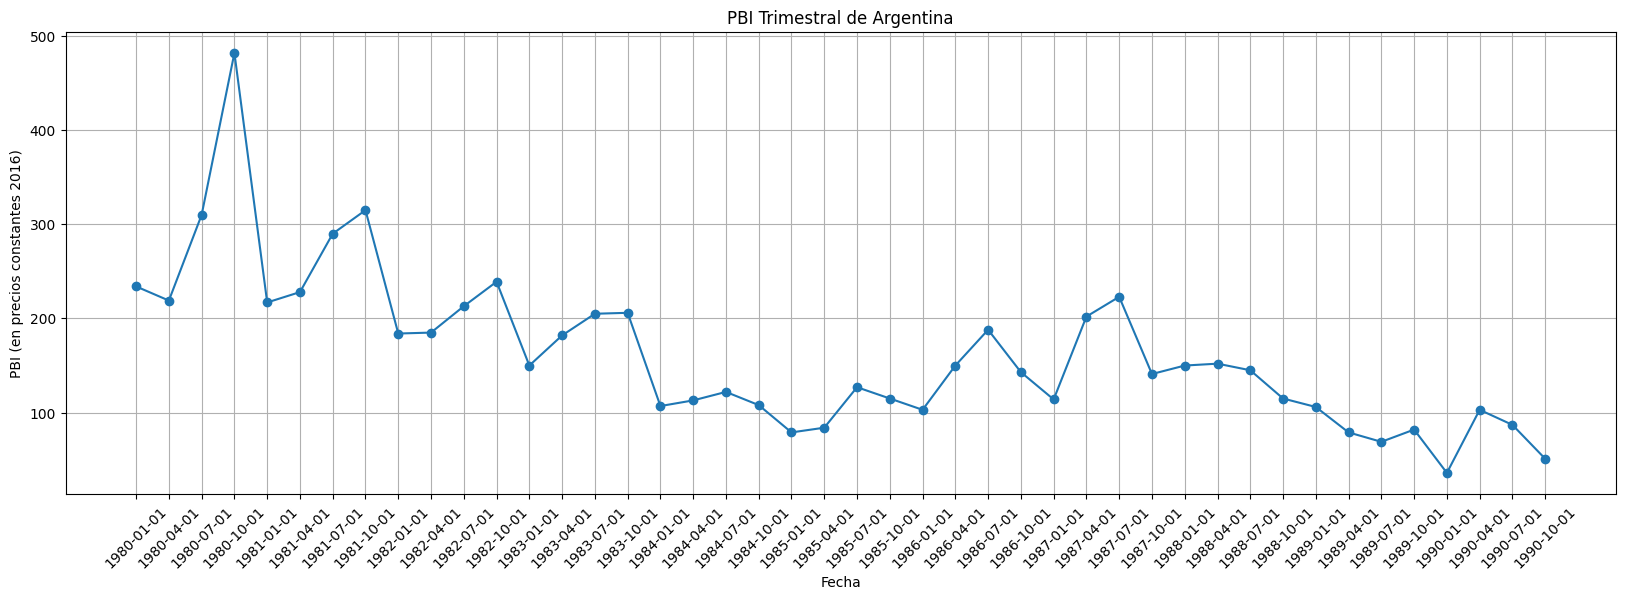

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df_pbi
plt.figure(figsize=(20, 6))
plt.plot(df_pbi["fecha"], df_pbi["valor"], marker="o")
plt.title("PBI Trimestral de Argentina")
plt.xlabel("Fecha")
plt.ylabel("PBI (en precios constantes 2016)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# PRUEBO CON OTRO DATO

In [ ]:
import requests

#url = "https://apis.datos.gob.ar/series/api/series/?ids=143.3_PBI_2016_A_19&format=json"
url = "https://apis.datos.gob.ar/series/api/series/?ids=101.1_I2NG_2016_M_22:percent_change_a_year_ago&format=json"
response = requests.get(url)
print(response.json())



#apis.datos.gob.ar/series/api/series/?ids=101.1_I2NG_2016_M_22:percent_change_a_year_ago&format=csv



{'data': [['2017-04-01', 0.27519193128591035], ['2017-05-01', 0.23957433246775398], ['2017-06-01', 0.21928019613991073], ['2017-07-01', 0.21536857962207467], ['2017-08-01', 0.2308402388788155], ['2017-09-01', 0.24172485879155456], ['2017-10-01', 0.22886733002340537], ['2017-11-01', 0.22341893973279794], ['2017-12-01', 0.25039199999999995], ['2018-01-01', 0.25368610148746956], ['2018-02-01', 0.25511205729781294], ['2018-03-01', 0.25634677078598617], ['2018-04-01', 0.2556057923388038], ['2018-05-01', 0.2636168338603685], ['2018-06-01', 0.29522841787483833], ['2018-07-01', 0.30897060127335074], ['2018-08-01', 0.3423056994146351], ['2018-09-01', 0.4028691415124409], ['2018-10-01', 0.4548709816441209], ['2018-11-01', 0.47961728487990746], ['2018-12-01', 0.47104348076443225], ['2019-01-01', 0.4889898570795349], ['2019-02-01', 0.5070822073308041], ['2019-03-01', 0.541300257372879], ['2019-04-01', 0.5514093969533659], ['2019-05-01', 0.5681279552944547], ['2019-06-01', 0.5484164287161981], ['20

In [ ]:
def get_ipc():
    url = "https://apis.datos.gob.ar/series/api/series/?ids=101.1_I2NG_2016_M_22:percent_change_a_year_ago&format=json"
    response = requests.get(url)
    json_data = response.json()
    if "data" in json_data:
        data = json_data["data"]
        df_ipc = pd.DataFrame(data, columns=["fecha", "valor"])
        df_ipc["valor"] = pd.to_numeric(df_ipc["valor"], errors="coerce")
        return df_ipc
    else:
        print("No se encontró la clave 'data'. Respuesta de la API:")
        print(json_data)
        return pd.DataFrame()  # Devuelve un DataFrame vacío

df_ipc = get_ipc()
print(df_ipc.head())

        fecha     valor
0  2017-04-01  0.275192
1  2017-05-01  0.239574
2  2017-06-01  0.219280
3  2017-07-01  0.215369
4  2017-08-01  0.230840


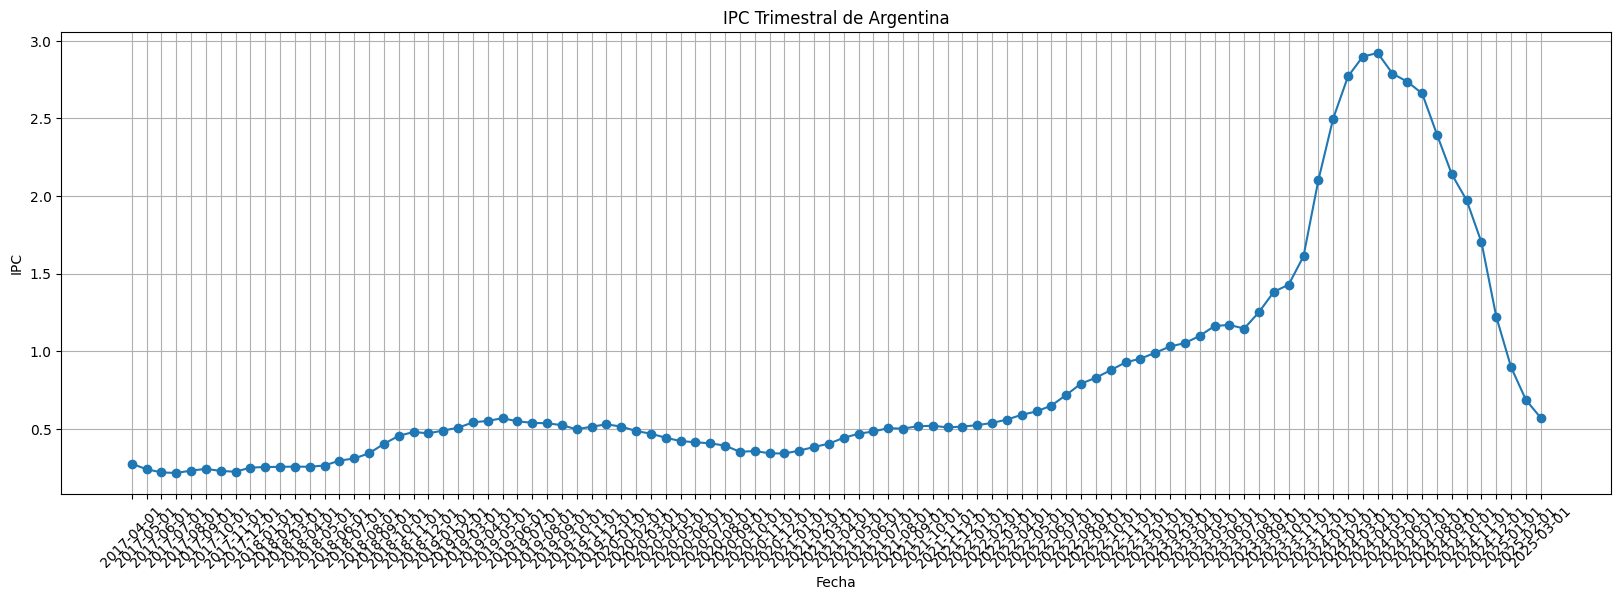

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que tu DataFrame se llama df_pbi
plt.figure(figsize=(20, 6))
plt.plot(df_ipc["fecha"], df_ipc["valor"], marker="o")
plt.title("IPC Trimestral de Argentina")
plt.xlabel("Fecha")
plt.ylabel("IPC")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.fi

In [ ]:
import requests
import pandas as pd

def get_series(ids):
    url = f"https://apis.datos.gob.ar/series/api/series/?ids={','.join(ids)}&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        json_response = response.json()
        if "data" in json_response:
            series_data = json_response["data"]
            df = pd.DataFrame(series_data, columns=["fecha"] + ids)
            df["fecha"] = pd.to_datetime(df["fecha"])
            for id in ids:
                df[id] = pd.to_numeric(df[id], errors="coerce")
            return df
        else:
            raise ValueError("No se encontró 'data' en la respuesta de la API.")
    else:
        raise Exception(f"Error en la API: {response.status_code}")

# Usar el ID correcto para trimestral
ids = ["143.3_PBI_2016_Q_19"]
df_series = get_series(ids)
print(df_series.head())



Exception: Error en la API: 400

# TRADING ECONOMICS (NECESITO REGISTRARME)

In [ ]:
import requests
import pandas as pd

def get_te_argentina(api_key):
    url = f"https://api.tradingeconomics.com/historical/country/argentina/indicator/gdp?c={api_key}&format=json"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)

# df_te = get_te_argentina("TU_API_KEY")
# print(df_te.head())

# VER QUE IDS ESTÁN DISPONIBLES


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving series-tiempo-metadatos.csv to series-tiempo-metadatos.csv


In [ ]:
import pandas as pd

# Cargar el CSV
df_meta = pd.read_csv("series-tiempo-metadatos.csv", low_memory=False)

# Ver las primeras filas
print(df_meta.head())

# Buscar series que contengan "PBI" en el título o descripción
df_pbi = df_meta[df_meta["catalogo_id"].str.contains("PBI", case=False, na=False) |
                 df_meta["dataset_id"].str.contains("PBI", case=False, na=False)]

print(df_pbi[["catalogo_id", "dataset_id", "serie_id", "distribucion_id"]])
df_pbi.info()

     catalogo_id                            dataset_id  \
0  agroindustria  091cb5ae-fa89-4c5d-a9cf-cd846dc13301   
1  agroindustria  0b1e7535-f267-4d7f-9fc8-f35f4c081f5c   
2  agroindustria  10105e94-c560-4b02-b15f-ef3ef764b833   
3  agroindustria  10105e94-c560-4b02-b15f-ef3ef764b833   
4  agroindustria  10105e94-c560-4b02-b15f-ef3ef764b833   

                        distribucion_id           serie_id  \
0  df8f7d09-797e-4e0b-9ad0-160f99edf2c0          AGRO_0010   
1  b1cca22c-d1b6-4816-95da-c8349be7278d          AGRO_0314   
2  dc3ae069-af81-4bdd-82cb-2f57f2c296dd  AGRO_A_Trigo_0001   
3  dc3ae069-af81-4bdd-82cb-2f57f2c296dd  AGRO_A_Trigo_0002   
4  dc3ae069-af81-4bdd-82cb-2f57f2c296dd  AGRO_A_Trigo_0003   

  indice_tiempo_frecuencia                    serie_titulo    serie_unidades  \
0                    R/P1M  leche_cruda_precio_promedio_kg  Pesos argentinos   
1                    R/P1M                produccion_leche            litros   
2                    R/P1Y    superfic

In [ ]:
import requests
import pandas as pd

def get_all_series_metadata():
    url = "https://apis.datos.gob.ar/series/api/series/?metadata=full&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        metadata = response.json()["catalogo_id"]["dataset_id"]
        df_meta = pd.DataFrame(metadata)
        return df_meta
    else:
        raise Exception(f"Error en la API: {response.status_code}")

# Obtener todos los metadatos
df_metadata = get_all_series_metadata()

# Mostrar algunos para ver
print(df_metadata[["identifier", "title", "description"]].head(10))


Exception: Error en la API: 400

In [ ]:
import requests
import pandas as pd

# Paso 1: Obtener todos los idVariable y buscar el de reservas (por ejemplo)

url_variables = "https://api.bcra.gob.ar//estadisticascambiarias/v1.0/Cotizaciones"
response = requests.get(url_variables, verify=False)
variables = pd.DataFrame(response.json()["results"])

data = response.json()["results"]

# Extraer la fecha y la lista de detalles
fecha = data["fecha"]
detalle = data["detalle"]

# Convertir la lista de detalles en DataFrame
df = pd.DataFrame(detalle)

# Agregar la columna de fecha a cada fila
df["fecha"] = fecha

# Reordenar columnas si quieres
df = df[["fecha"] + [col for col in df.columns if col != "fecha"]]

df.head()

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,fecha,codigoMoneda,descripcion,tipoPase,tipoCotizacion
0,2025-05-07,ARS,PESO,0.000890,0.000000
1,2025-05-07,AUD,DOLAR AUSTRALIA,0.645200,725.204800
2,2025-05-07,AWG,FLORIN (ANTILLAS HOLANDESAS),0.558659,627.932961
3,2025-05-07,BOB,BOLIVIANOS,0.145085,163.075807
4,2025-05-07,BRL,REAL,0.174171,195.767657


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha           39 non-null     object 
 1   codigoMoneda    39 non-null     object 
 2   descripcion     39 non-null     object 
 3   tipoPase        39 non-null     float64
 4   tipoCotizacion  39 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.7+ KB


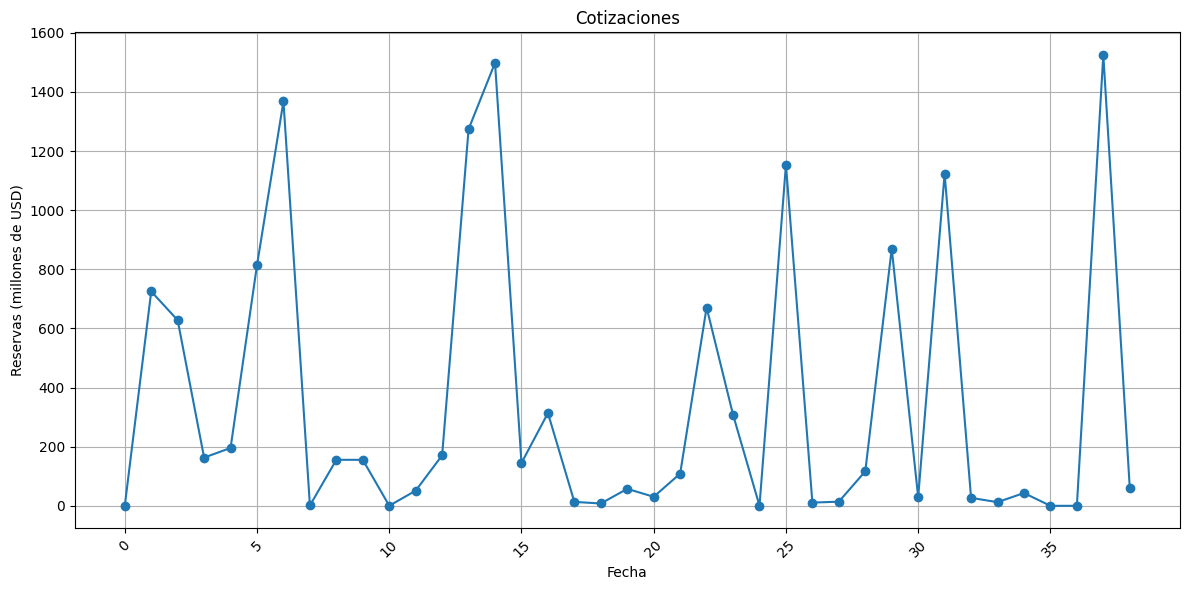

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["tipoCotizacion"], marker="o")
plt.title("Cotizaciones")
plt.xlabel("Fecha")
plt.ylabel("Reservas (millones de USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# nuevos datos intermensuales